# Gender, Age and Ethnicity data visualization

## Most and least vaccinated by ethnic group

In [1]:
## Dependencies
import pandas as pd
import requests
import time
import datetime
import matplotlib
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as st

## Gender, age, ethnic group of the best and worst fips

### 1. Data loading and pre-processing

In [2]:
# For this analysis, we are going to use the census csv and the most affected csv files.
# We are going to compare the demographic description of the most affected counties

most_affected= pd.read_csv('analysis_data/most_affected.csv', dtype={'FIPS Code':str})
most_affected.set_index('FIPS Code', drop=True, inplace=True)
most_affected

,Patients,Hospitalized,ICU,Death
FIPS Code,,,,
06037,1124813.0,81869.0,15949.0,21291.0
04013,531243.0,46700.0,1.0,8435.0
17031,530918.0,31810.0,5525.0,11573.0
12086,398878.0,9375.0,1.0,6136.0
06071,289868.0,9806.0,1386.0,3724.0
06065,285987.0,7458.0,824.0,3483.0
06073,274033.0,15143.0,1657.0,2833.0
36047,268440.0,33398.0,2396.0,10704.0
36081,266518.0,33505.0,2539.0,9928.0


In [3]:

vaccination = pd.read_csv('analysis_data/vaccination_data.csv', dtype={'FIPS Code':str})
vaccination

,FIPS Code,Geographical Point,Social Vulnerability Index (SVI),SVI Category,Percent adults fully vaccinated against COVID-19,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Percent non-Hispanic Other
0,1001,POINT (-86.844516 32.756889),0.44,Moderate Concern,0.114,0.0283,0.0025,0.0103,0.1900,0.0001,0.7460,0.6548
1,1003,POINT (-86.844516 32.756889),0.22,Low Concern,0.176,0.0456,0.0065,0.0092,0.0917,0.0000,0.8307,0.6710
2,1005,POINT (-86.844516 32.756889),1.00,Very High Concern,0.128,0.0436,0.0029,0.0048,0.4744,0.0000,0.4581,0.3463
3,1007,POINT (-86.844516 32.756889),0.60,High Concern,0.115,0.0257,0.0013,0.0012,0.2214,0.0000,0.7453,0.6354
4,1009,POINT (-86.844516 32.756889),0.42,Moderate Concern,0.095,0.0926,0.0007,0.0037,0.0153,0.0004,0.8689,0.7923
...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,POINT (-107.55145 42.999627),0.37,Low Concern,0.228,0.1588,0.0102,0.0074,0.0112,0.0003,0.7956,0.5841
3138,56039,POINT (-107.55145 42.999627),0.11,Very Low Concern,0.305,0.1503,0.0033,0.0125,0.0124,0.0012,0.8134,0.5153
3139,56041,POINT (-107.55145 42.999627),0.45,Moderate Concern,0.206,0.0913,0.0065,0.0016,0.0011,0.0000,0.8752,0.6935
3140,56043,POINT (-107.55145 42.999627),0.37,Low Concern,0.264,0.1423,0.0052,0.0000,0.0004,0.0000,0.8190,0.5881


In [4]:
# We call the csv census file. 
# We use the fips code of the most affected counties to select the census information.

census_combined = pd.read_csv('clean_data/census_2019_combined.csv', dtype={'FIPS Code':str})
census_combined.set_index('FIPS Code', drop=True, inplace=True)
census_combined = census_combined.loc[most_affected.index]
census_combined

,Unnamed: 0,STNAME,CTYNAME,POPESTIMATE2019,TOT_MALE,TOT_FEMALE,0 - 17 years,18 - 49 years,50 - 64 years,65 + years,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Percent non-Hispanic Other,Latitude,Longitude
FIPS Code,,,,,,,,,,,,,,,,,,,
06037,204,California,Los Angeles County,10039107,4949041,5090066,2399105,4360177,1866072,1413753,0.4849,0.0021,0.1443,0.0784,0.0024,0.2620,0.0969,37.211164,-119.662127
04013,103,Arizona,Maricopa County,4485414,2217230,2268184,1172216,1824027,792840,696331,0.3099,0.0162,0.0409,0.0531,0.0020,0.5524,0.3789,34.293239,-111.664616
17031,610,Illinois,Cook County,5150233,2500872,2649361,1234271,2190882,948851,776229,0.2529,0.0010,0.0723,0.2307,0.0002,0.4229,0.2509,40.124144,-89.148632
12086,362,Florida,Miami-Dade County,2716940,1320180,1396760,612328,1112355,539650,452607,0.6849,0.0008,0.0151,0.1579,0.0002,0.1319,-0.0389,28.260731,-82.420978
06071,221,California,San Bernardino County,2180085,1085607,1094478,629595,913680,376290,260520,0.5332,0.0036,0.0699,0.0788,0.0029,0.2853,0.1516,37.211164,-119.662127
06065,218,California,Riverside County,2470546,1232012,1238534,683510,984801,436293,365942,0.4891,0.0043,0.0632,0.0610,0.0027,0.3532,0.2037,37.211164,-119.662127
06073,222,California,San Diego County,3338330,1680017,1658313,805485,1452636,595757,484452,0.3370,0.0038,0.1163,0.0471,0.0038,0.4556,0.3130,37.211164,-119.662127
36047,1851,New York,Kings County,2559903,1212194,1347709,629964,1132421,429634,367884,0.1904,0.0014,0.1178,0.2997,0.0004,0.3640,0.2393,42.921241,-75.596550
36081,1868,New York,Queens County,2253858,1093889,1159969,494209,939814,451502,368333,0.2804,0.0023,0.2534,0.1721,0.0004,0.2505,0.1064,42.921241,-75.596550


In [5]:
# We start creating the daframes.
# In this case, we will select the totals of each gender.

worst_gender = census_combined[['TOT_MALE', 'TOT_FEMALE']]
worst_gender

,TOT_MALE,TOT_FEMALE
FIPS Code,,
06037,4949041,5090066
04013,2217230,2268184
17031,2500872,2649361
12086,1320180,1396760
06071,1085607,1094478
06065,1232012,1238534
06073,1680017,1658313
36047,1212194,1347709
36081,1093889,1159969


In [6]:
# In order to observe the real gender values (total divided by county population), we must create a new dataframe with
# the relative values we obtained.

worst_gender_rel = pd.DataFrame((worst_gender["TOT_MALE"]/census_combined["POPESTIMATE2019"]), columns = ['REL_MALE'])
worst_gender_rel['REL_FEMALE'] = worst_gender["TOT_FEMALE"]/census_combined["POPESTIMATE2019"]
worst_gender_rel

,REL_MALE,REL_FEMALE
FIPS Code,,
06037,0.492976,0.507024
04013,0.494320,0.505680
17031,0.485584,0.514416
12086,0.485907,0.514093
06071,0.497965,0.502035
06065,0.498680,0.501320
06073,0.503251,0.496749
36047,0.473531,0.526469
36081,0.485341,0.514659


In [7]:
# Now, we select the information regarding age.

worst_agegroup = census_combined[['0 - 17 years', '18 - 49 years', '50 - 64 years', '65 + years']]
worst_agegroup

,0 - 17 years,18 - 49 years,50 - 64 years,65 + years
FIPS Code,,,,
06037,2399105,4360177,1866072,1413753
04013,1172216,1824027,792840,696331
17031,1234271,2190882,948851,776229
12086,612328,1112355,539650,452607
06071,629595,913680,376290,260520
06065,683510,984801,436293,365942
06073,805485,1452636,595757,484452
36047,629964,1132421,429634,367884
36081,494209,939814,451502,368333


In [8]:
# We create the compared age dataframe

worst_age_rel = pd.DataFrame((worst_agegroup["0 - 17 years"]/census_combined["POPESTIMATE2019"]), 
                             columns = ['0 - 17 years'])
worst_age_rel['18 - 49 years'] = worst_agegroup["18 - 49 years"]/census_combined["POPESTIMATE2019"]
worst_age_rel['50 - 64 years'] = worst_agegroup["50 - 64 years"]/census_combined["POPESTIMATE2019"]
worst_age_rel['65 + years'] = worst_agegroup["65 + years"]/census_combined["POPESTIMATE2019"]
worst_age_rel

,0 - 17 years,18 - 49 years,50 - 64 years,65 + years
FIPS Code,,,,
06037,0.238976,0.434319,0.185880,0.140825
04013,0.261340,0.406657,0.176760,0.155243
17031,0.239653,0.425395,0.184235,0.150717
12086,0.225374,0.409415,0.198624,0.166587
06071,0.288794,0.419103,0.172603,0.119500
06065,0.276664,0.398617,0.176598,0.148122
06073,0.241284,0.435139,0.178460,0.145118
36047,0.246089,0.442369,0.167832,0.143710
36081,0.219272,0.416980,0.200324,0.163423


In [9]:
# We create the ehtnic group dataframe
# Since the information is already in percentages, so we don't need a compared dataframe.

worst_ethnic = census_combined[['Percent Hispanic', 'Percent non-Hispanic American Indian/Alaska Native', 
                                'Percent non-Hispanic Asian', 'Percent non-Hispanic Black', 
                                'Percent non-Hispanic Native Hawaiian/Pacific Islander', 
                                'Percent non-Hispanic White']]
worst_ethnic

,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White
FIPS Code,,,,,,
06037,0.4849,0.0021,0.1443,0.0784,0.0024,0.2620
04013,0.3099,0.0162,0.0409,0.0531,0.0020,0.5524
17031,0.2529,0.0010,0.0723,0.2307,0.0002,0.4229
12086,0.6849,0.0008,0.0151,0.1579,0.0002,0.1319
06071,0.5332,0.0036,0.0699,0.0788,0.0029,0.2853
06065,0.4891,0.0043,0.0632,0.0610,0.0027,0.3532
06073,0.3370,0.0038,0.1163,0.0471,0.0038,0.4556
36047,0.1904,0.0014,0.1178,0.2997,0.0004,0.3640
36081,0.2804,0.0023,0.2534,0.1721,0.0004,0.2505


### 2. Data visualization

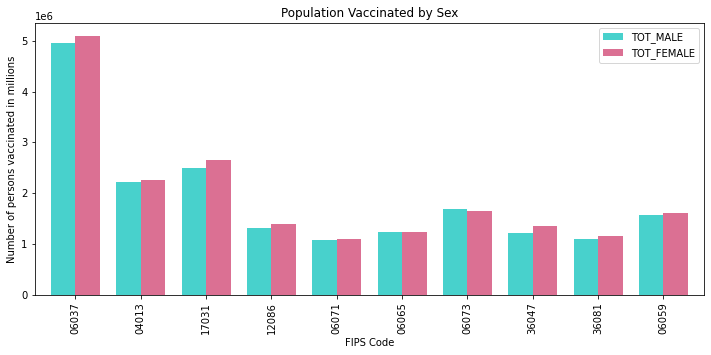

In [10]:
# We begin with the visualization
# In order to fully observe the variations of the demographic characteristics, we chose a graph bar for this section.
# Since we have fully usable dataframes, we won't use matplotlib to graph them, we will use .plot()

gender_graph= worst_gender.plot(kind='bar', width = 0.75, figsize=(12,5), color=['mediumturquoise', 'palevioletred'])
gender_graph
plt.title("Population Vaccinated by Sex")
plt.xlabel("FIPS Code")
plt.ylabel("Number of persons vaccinated in millions")
plt.savefig('figures/gender_graph_abs.png', dpi=300, bbox_inches = "tight")
plt.show()

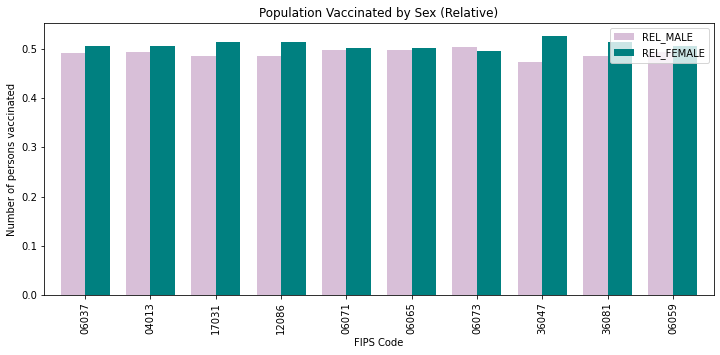

In [11]:
# Now we use the compared gender dataframe to create a friendly visualization. 

gender_graph_rel= worst_gender_rel.plot(kind='bar', width = 0.75, figsize=(12, 5), color=['thistle', 'teal'])
gender_graph_rel
plt.title("Population Vaccinated by Sex (Relative)")
plt.xlabel("FIPS Code")
plt.ylabel("Number of persons vaccinated")
plt.savefig('figures/gender_graph_rel.png', dpi=300, bbox_inches = "tight")


plt.show()

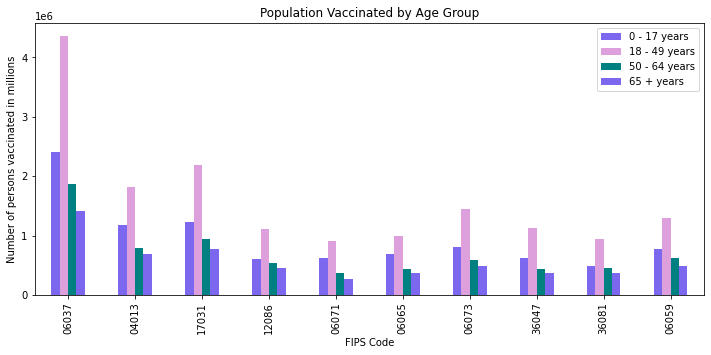

In [12]:
# We repeat the process for the Age Group dataframe

worst_agegroup.plot(kind='bar', figsize=(12,5), color=['mediumslateblue', 'plum', 'teal'])
plt.title("Population Vaccinated by Age Group")
plt.xlabel("FIPS Code")
plt.ylabel("Number of persons vaccinated in millions")
plt.savefig('figures/worst_agegroup.png', dpi=300, bbox_inches = "tight")


plt.show()

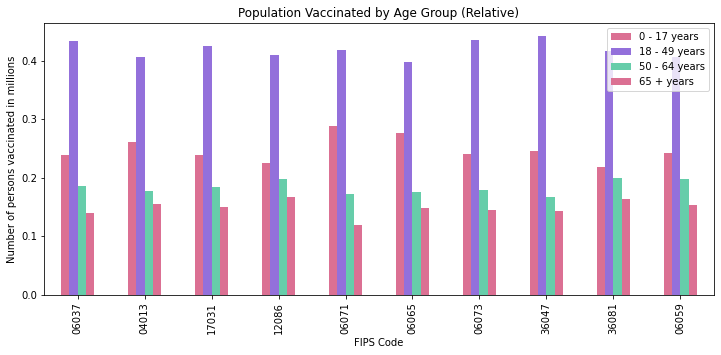

In [13]:
# Same process for the compared Age Group.

age_rel_grahp = worst_age_rel.plot(kind='bar', figsize=(12, 5), color=['palevioletred', 'mediumpurple', 'mediumaquamarine'])
plt.title("Population Vaccinated by Age Group (Relative)")
plt.xlabel("FIPS Code")
plt.ylabel("Number of persons vaccinated in millions")
plt.savefig('figures/age_rel_grahp.png', dpi=300, bbox_inches = "tight")


plt.show()

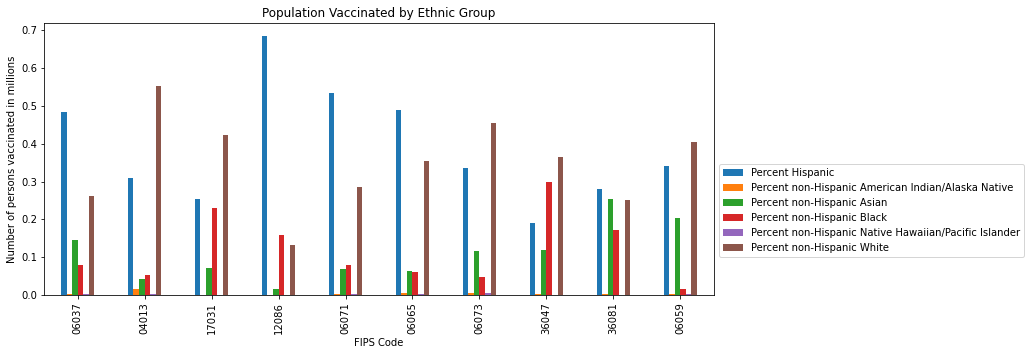

In [14]:
# We follow the same process for the percentages of ethnic group.

worst_ethnic.plot(kind='bar', figsize=(12, 5))
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5))
plt.title("Population Vaccinated by Ethnic Group")
plt.xlabel("FIPS Code")
plt.ylabel("Number of persons vaccinated in millions")
plt.savefig('figures/worst_fips_eth.png', dpi=300, bbox_inches = "tight")


plt.show()

## Demographics regressions

### 1. Data loading and pre-processing

In this section, we will see if there is a relation between the fully vaccinated adults and their ethnic group. In order to do this, we'll make scatter plots, we'll calculate the Pearson Coefficient, the Linear regression Coefficient and graph it, all of this for each ethnic group. We'll do this in hopes of finding a relation. 

In [17]:
# We create the dataframe we need from the Vaccionation Dataset previously imported. 

full = vaccination['Percent adults fully vaccinated against COVID-19']
hisp = vaccination['Percent Hispanic']
nat = vaccination['Percent non-Hispanic American Indian/Alaska Native']
asian = vaccination['Percent non-Hispanic Asian']
black = vaccination['Percent non-Hispanic Black']
pac = vaccination['Percent non-Hispanic Native Hawaiian/Pacific Islander']
white = vaccination['Percent non-Hispanic White']

pers_vaccinated = pd.DataFrame(data={full.name:full, hisp.name:hisp, nat.name:nat, asian.name:asian, black.name:black, 
                                    pac.name:pac, white.name:white})

# In order to do the linear regression, our dataframe must be clean from empty values and NAN's. In order to do this,
# dropna()

pers_vaccinated.dropna(inplace=True)

### 2. Data visualization

Pearson correlation coefficient (r-value): -0.04
Linear reggression coefficient of detemination (r-squared): 0.0019


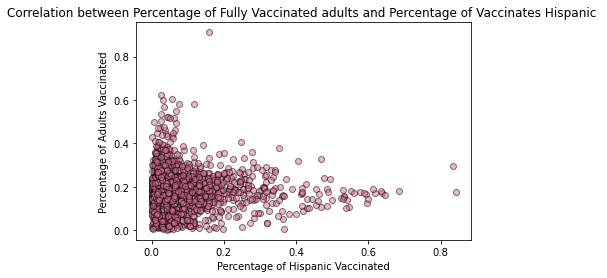

In [26]:
# To create our scatter plots, we must define our variables. Y variable will be the fully vaccionated adults 
# and x will be the percentage of each ethnic group. 

adults_vacc = pers_vaccinated['Percent adults fully vaccinated against COVID-19']
hisp_vacc= pers_vaccinated['Percent Hispanic']
plt.scatter(hisp_vacc, adults_vacc, color='palevioletred', alpha=0.5, edgecolors= 'black')
plt.title("Correlation between Percentage of Fully Vaccinated adults and Percentage of Vaccinates Hispanic ")
plt.ylabel("Percentage of Adults Vaccinated")
plt.xlabel("Percentage of Hispanic Vaccinated")

# We run the linear regression, graphic it and calculate the coefficients. 

print(f"Pearson correlation coefficient (r-value): {round(st.pearsonr(hisp_vacc, adults_vacc)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(hisp_vacc, adults_vacc)
print(f"Linear reggression coefficient of detemination (r-squared): {rvalue**2:.4f}")


plt.show()

Pearson correlation coefficient (r-value): 0.33
Linear reggression coefficient of detemination (r-squared): 0.1078


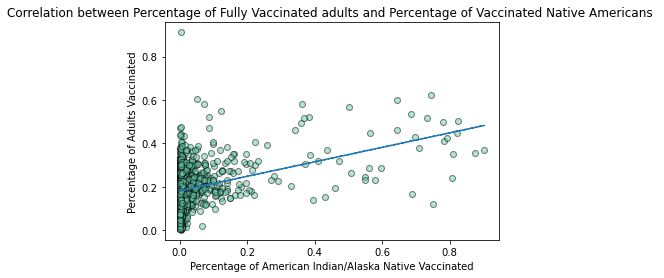

In [27]:
# We will repeat this process for each ethnic group. 

nat_vacc= pers_vaccinated['Percent non-Hispanic American Indian/Alaska Native']
plt.scatter(nat_vacc, adults_vacc, color='mediumaquamarine', alpha=0.5, edgecolors= 'black')
plt.title("Correlation between Percentage of Fully Vaccinated adults and Percentage of Vaccinated Native Americans ")
plt.ylabel("Percentage of Adults Vaccinated")
plt.xlabel("Percentage of American Indian/Alaska Native Vaccinated")


vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(nat_vacc, adults_vacc)
vc_fit = vc_slope * nat_vacc + vc_int
plt.plot(nat_vacc,vc_fit,"--")


print(f"Pearson correlation coefficient (r-value): {round(st.pearsonr(nat_vacc, adults_vacc)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(nat_vacc, adults_vacc)
print(f"Linear reggression coefficient of detemination (r-squared): {rvalue**2:.4f}")



plt.show()

Pearson correlation coefficient (r-value): 0.04
Linear reggression coefficient of detemination (r-squared): 0.0019


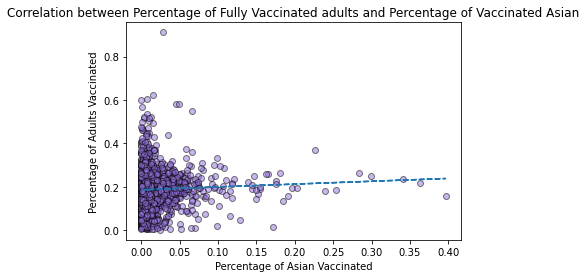

In [28]:
asian_vacc= pers_vaccinated['Percent non-Hispanic Asian']
plt.scatter( asian_vacc, adults_vacc, color='mediumpurple', alpha=0.5, edgecolors= 'black')
plt.title("Correlation between Percentage of Fully Vaccinated adults and Percentage of Vaccinated Asian")
plt.ylabel("Percentage of Adults Vaccinated")
plt.xlabel("Percentage of Asian Vaccinated")


vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(asian_vacc, adults_vacc)
vc_fit = vc_slope * asian_vacc + vc_int
plt.plot(asian_vacc,vc_fit,"--")


print(f"Pearson correlation coefficient (r-value): {round(st.pearsonr(asian_vacc, adults_vacc)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(asian_vacc, adults_vacc)
print(f"Linear reggression coefficient of detemination (r-squared): {rvalue**2:.4f}")



plt.show()

Pearson correlation coefficient (r-value): -0.25
Linear reggression coefficient of detemination (r-squared): 0.0639


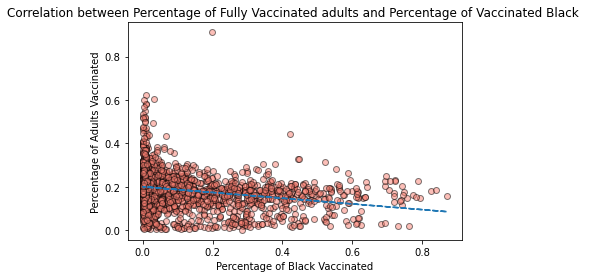

In [29]:
black_vacc= pers_vaccinated['Percent non-Hispanic Black']
plt.scatter(black_vacc, adults_vacc, color='salmon', alpha=0.5, edgecolors= 'black')
plt.title("Correlation between Percentage of Fully Vaccinated adults and Percentage of Vaccinated Black ")
plt.ylabel("Percentage of Adults Vaccinated")
plt.xlabel("Percentage of Black Vaccinated")


vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(black_vacc, adults_vacc)
vc_fit = vc_slope * black_vacc + vc_int
plt.plot(black_vacc,vc_fit,"--")

print(f"Pearson correlation coefficient (r-value): {round(st.pearsonr(black_vacc, adults_vacc)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(black_vacc, adults_vacc)
print(f"Linear reggression coefficient of detemination (r-squared): {rvalue**2:.4f}")


plt.show()

Pearson correlation coefficient (r-value): 0.04
Linear reggression coefficient of detemination (r-squared): 0.0020


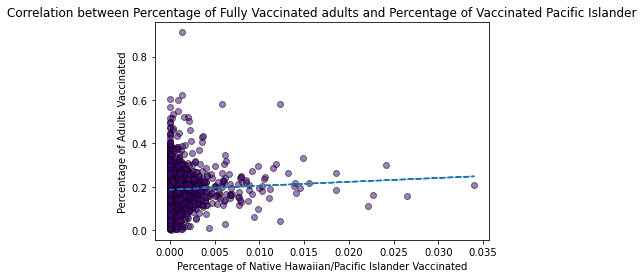

In [30]:
pacific_vacc= pers_vaccinated['Percent non-Hispanic Native Hawaiian/Pacific Islander']
plt.scatter(pacific_vacc, adults_vacc, color='indigo', alpha=0.5, edgecolors= 'black')
plt.title("Correlation between Percentage of Fully Vaccinated adults and Percentage of Vaccinated Pacific Islander")
plt.ylabel("Percentage of Adults Vaccinated")
plt.xlabel("Percentage of Native Hawaiian/Pacific Islander Vaccinated")


vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(pacific_vacc, adults_vacc)
vc_fit = vc_slope * pacific_vacc + vc_int
plt.plot(pacific_vacc,vc_fit,"--")

print(f"Pearson correlation coefficient (r-value): {round(st.pearsonr(pacific_vacc, adults_vacc)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(pacific_vacc, adults_vacc)
print(f"Linear reggression coefficient of detemination (r-squared): {rvalue**2:.4f}")


plt.show()

Pearson correlation coefficient (r-value): 0.07
Linear reggression coefficient of detemination (r-squared): 0.0052


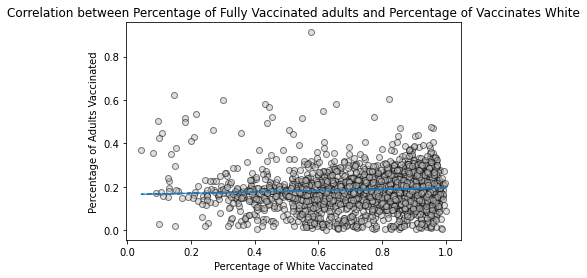

In [31]:
white_vacc= pers_vaccinated['Percent non-Hispanic White']
plt.scatter(white_vacc, adults_vacc, color='silver', alpha=0.5, edgecolors= 'black')
plt.title("Correlation between Percentage of Fully Vaccinated adults and Percentage of Vaccinates White")
plt.ylabel("Percentage of Adults Vaccinated")
plt.xlabel("Percentage of White Vaccinated")


vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(white_vacc, adults_vacc)
vc_fit = vc_slope * white_vacc + vc_int
plt.plot(white_vacc,vc_fit,"--")

print(f"Pearson correlation coefficient (r-value): {round(st.pearsonr(white_vacc, adults_vacc)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(white_vacc, adults_vacc)
print(f"Linear reggression coefficient of detemination (r-squared): {rvalue**2:.4f}")


plt.show()